# Independent Component Analysis Main Activity
*Final Project Group 15*

*ECE 532 Spring 2020*

In [1]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt
from sklearn.decomposition import FastICA

In [2]:
def plot_signal_matrix(X, title="figure"):
    plot = plt.figure()
    X = X.T
    for x in X:
        plt.plot(x)
    plt.title(title)

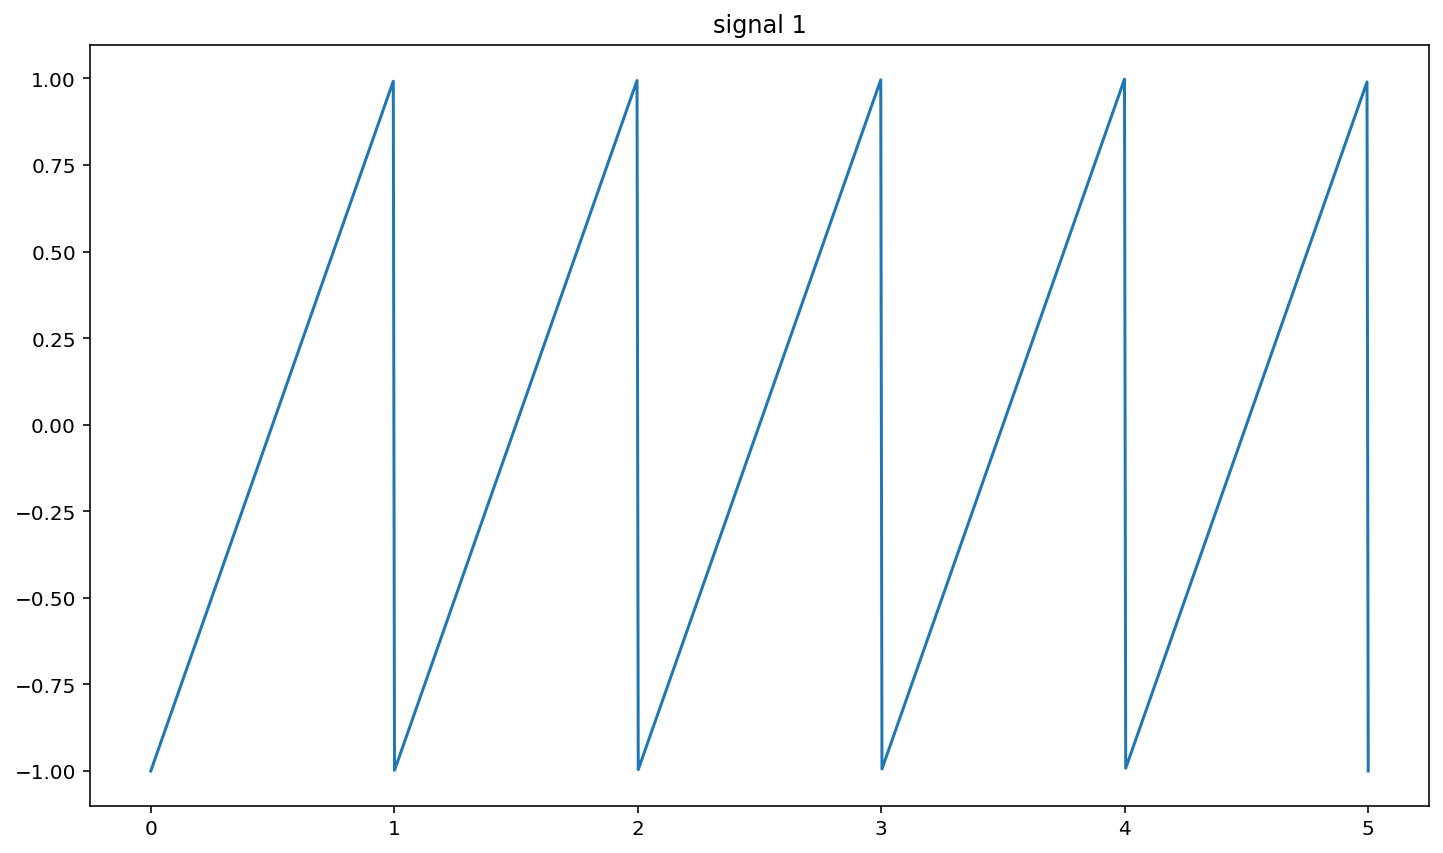

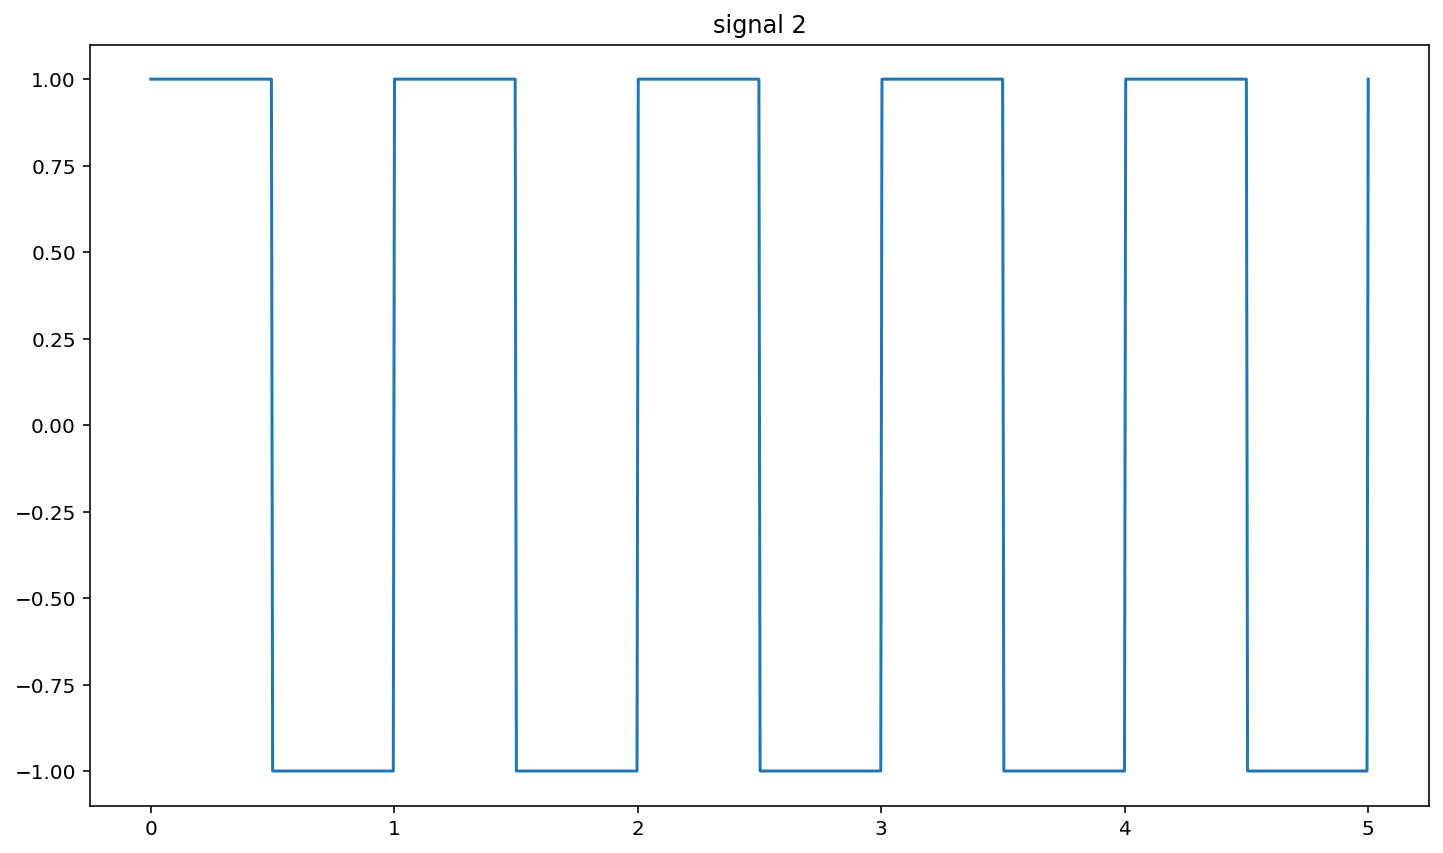

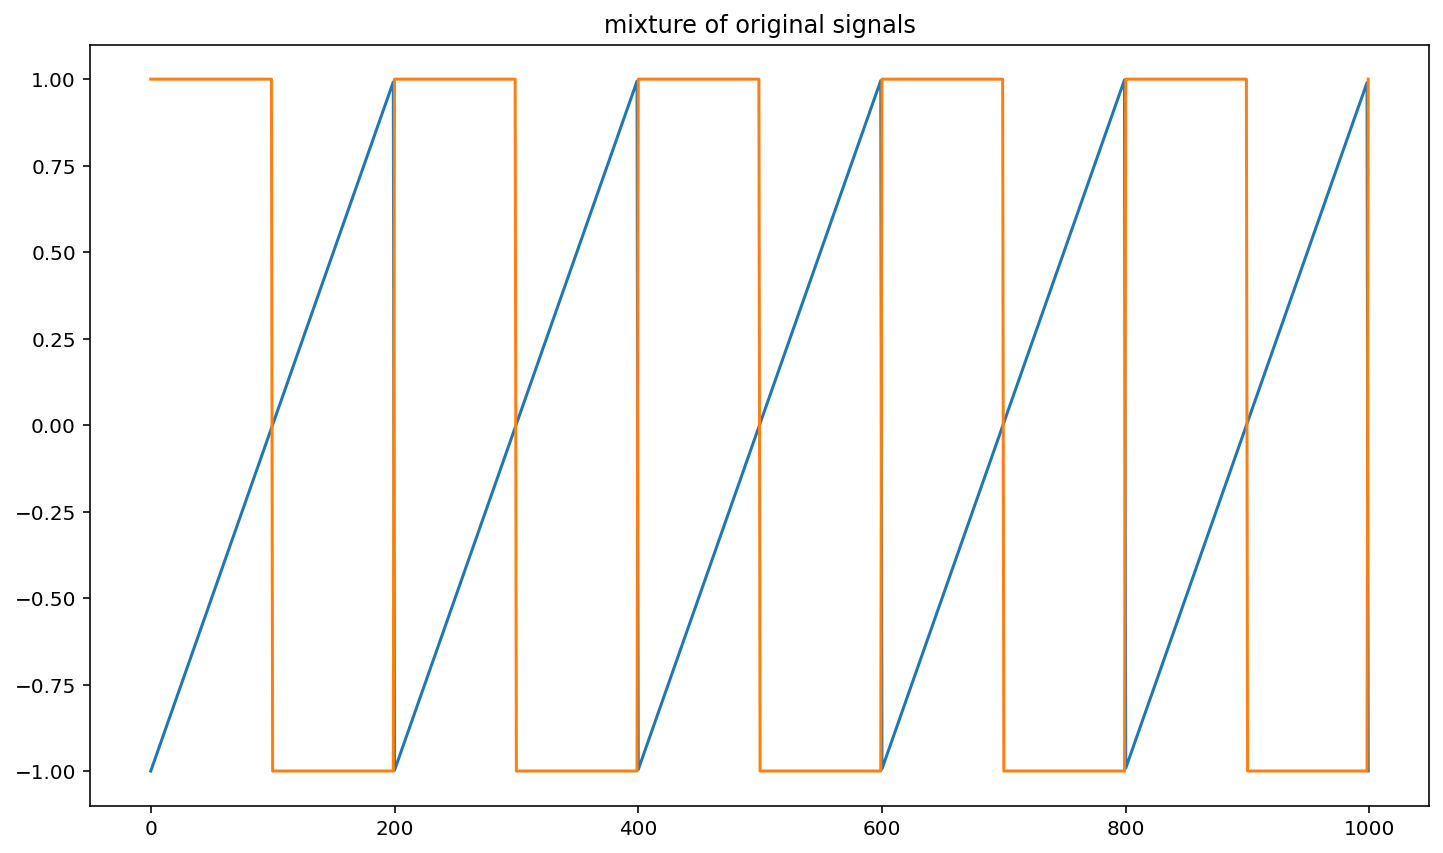

In [3]:
n = 1000 # number of samples for our signal
t = np.linspace(0, 5, n) # the evenly spaced interval for our signal

s1 = signal.sawtooth(2 * np.pi * t)
s2 = signal.square(2 * np.pi * t)
# s2 = signal.sweep_poly(2 * np.pi * t)

plot1 = plt.figure(1)
plt.plot(t, s1)
plt.title("signal 1")
plot1 = plt.figure(2)
plt.plot(t, s2)
plt.title("signal 2")
S = np.vstack((np.array(s1), np.array(s2))).T
plot_signal_matrix(S, title="mixture of original signals")

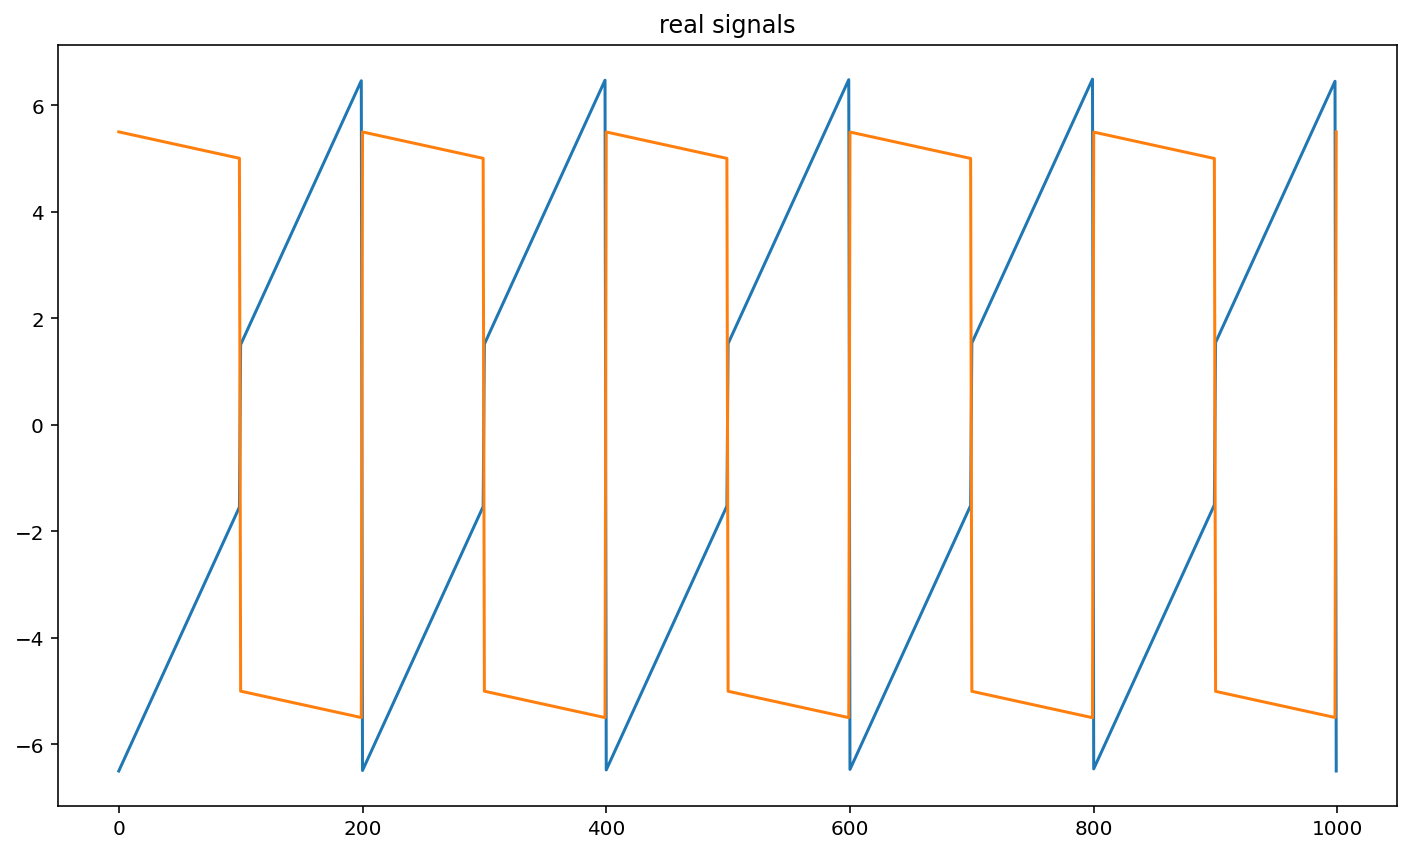

In [4]:
A = np.array(([5, -0.5], [-1.5, 5]))
X = S@A
plot_signal_matrix(X, title="real signals")

# 6a

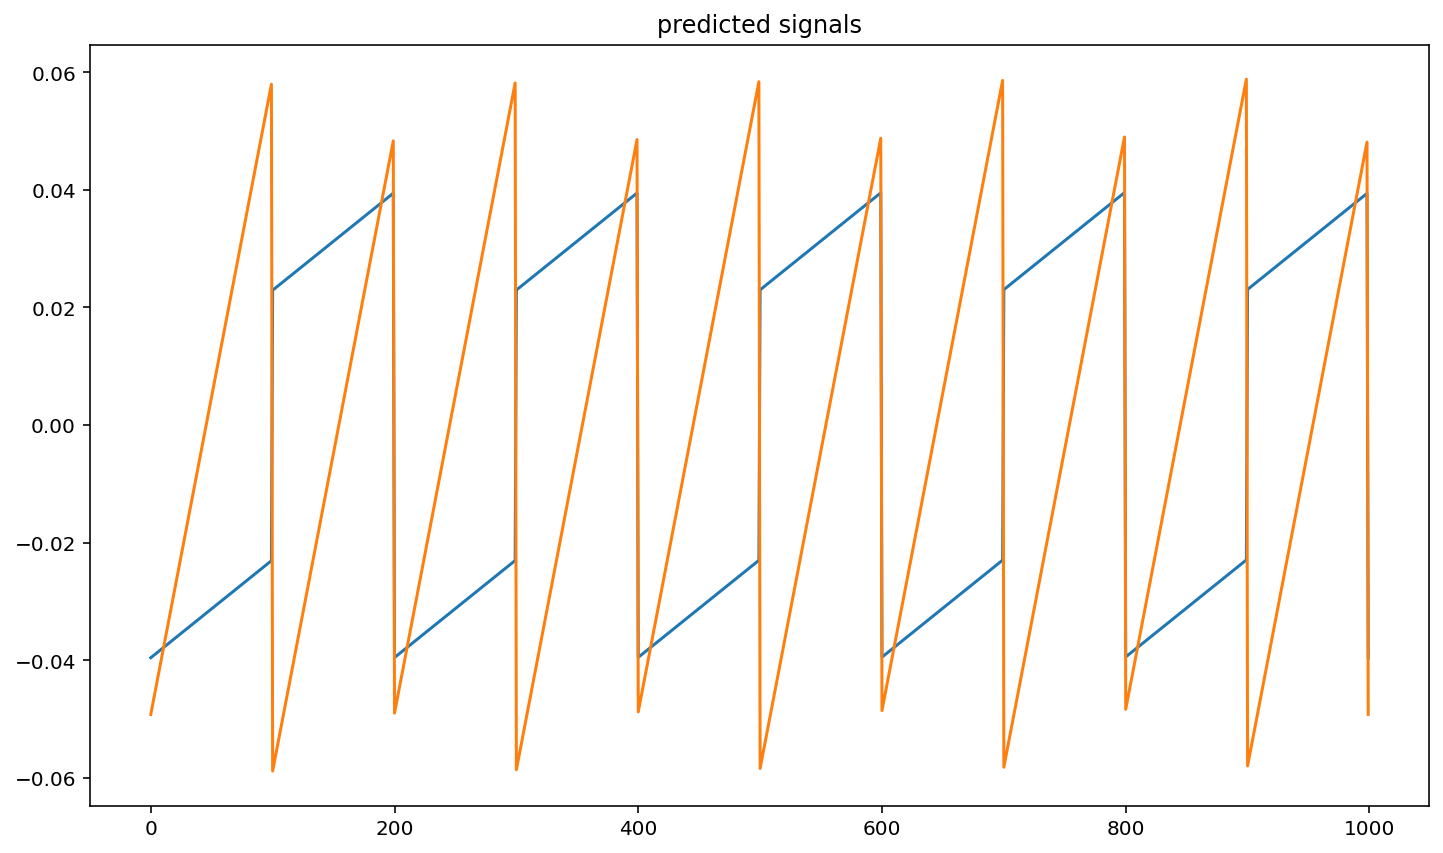

In [5]:
# 6a
U, s, VT = np.linalg.svd(X, full_matrices=False)
plot_signal_matrix(U, title="predicted signals")

# 6b

In [6]:
ica = FastICA(n_components=2)
X_hat = ica.fit_transform(X)

# ica = ?
# X_hat = ?

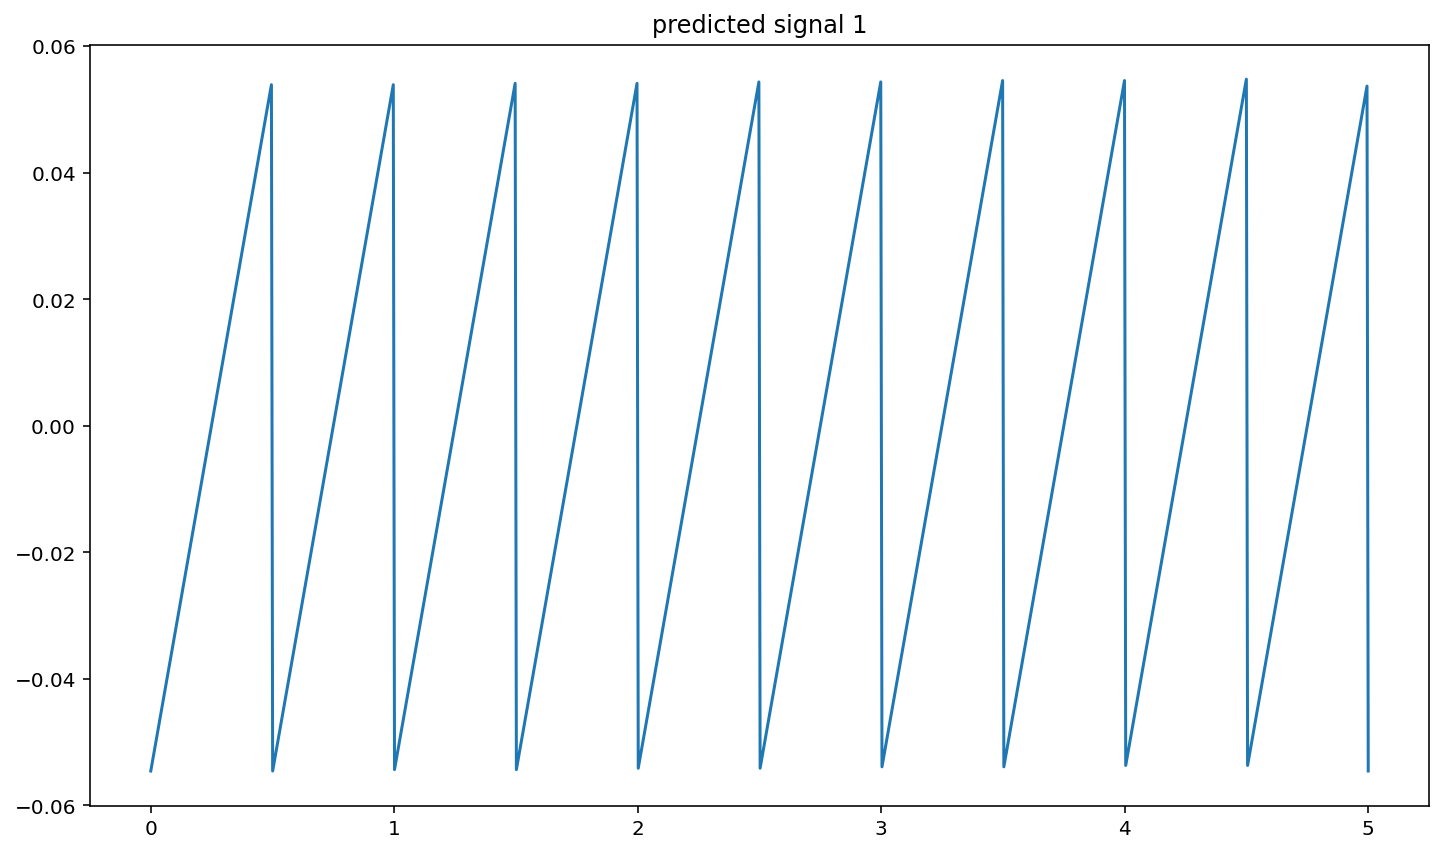

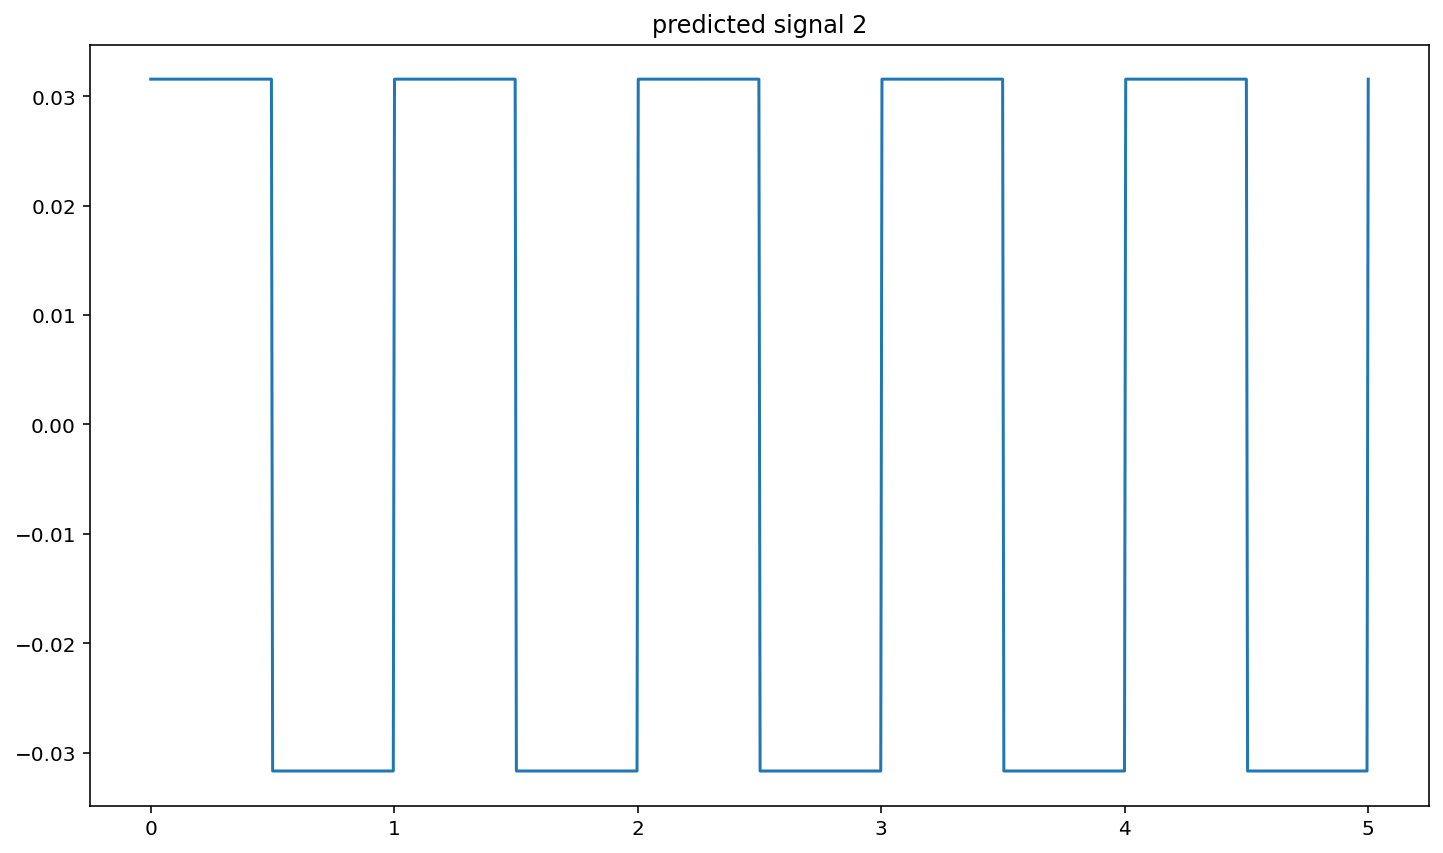

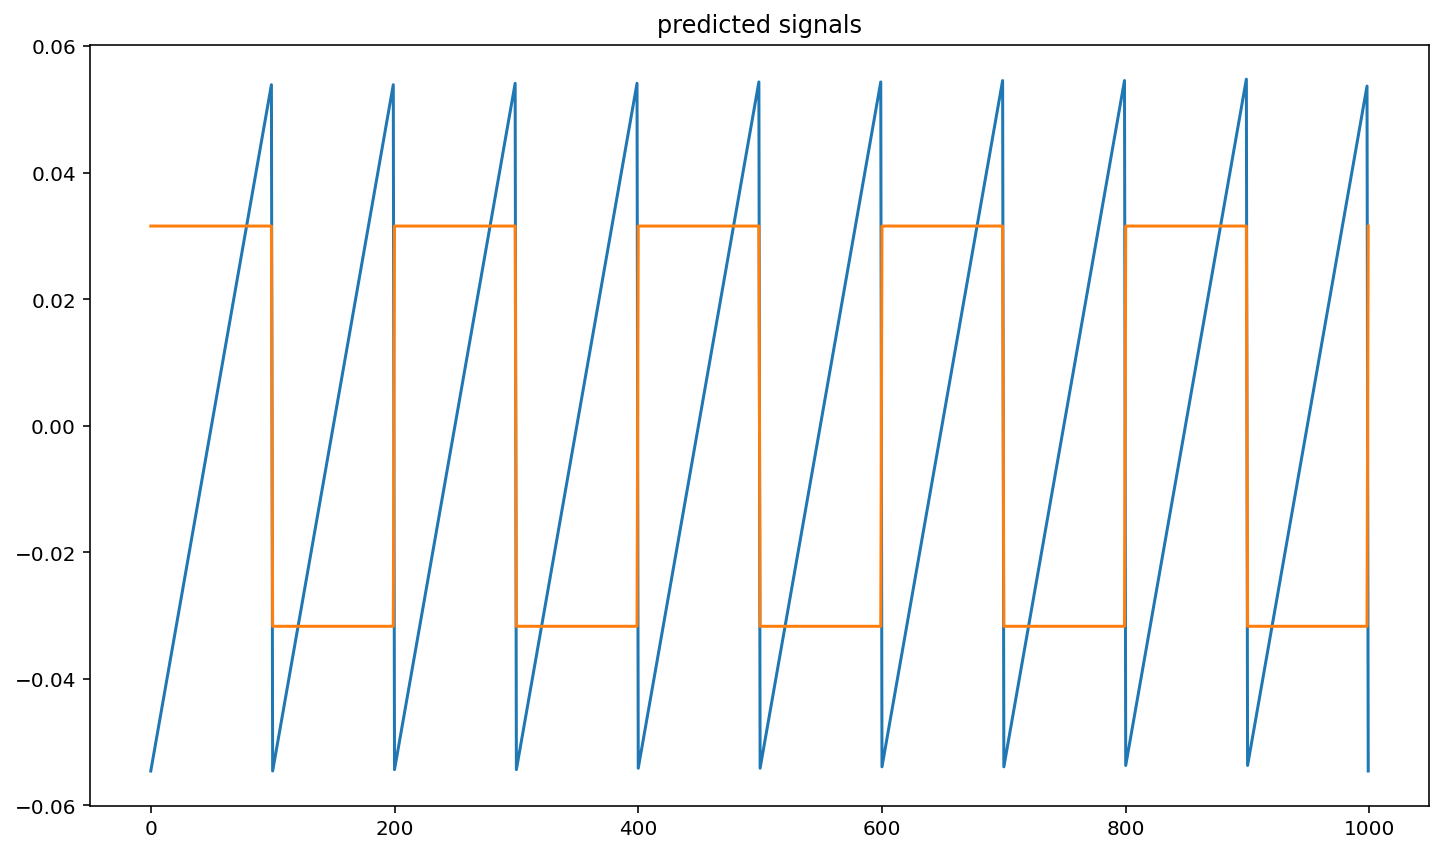

In [7]:
plot1 = plt.figure(1)
plt.plot(t, X_hat[:,0])
plt.title("predicted signal 1")
plot1 = plt.figure(2)
plt.plot(t, X_hat[:,1])
plt.title("predicted signal 2")
plot_signal_matrix(X_hat, title="predicted signals")

# 7a

In [8]:
def centering(x):
#     return ?
    return x - x.mean(axis=1, keepdims=True)

In [9]:
def whitening(x):
    d, E = np.linalg.eig(np.cov(x))
    D = np.diag(d)
    D_inv_sqrt = np.sqrt(np.linalg.inv(D))

    x_whiten = E@D_inv_sqrt@E.T@x
#     x_whiten = ?
    return x_whiten

# 7b

In [10]:
alpha = 1

In [11]:
def g(x):
    return np.tanh(x)*alpha

def g_prime(x):
    return (1 - g(x)*g(x))*alpha

def update_w(w, X):
    w_new = np.mean((X * g(w.T@X)), 1) - np.mean(g_prime(w.T@X), 0) * w
#     w_new = ?

    w_new /= np.linalg.norm(w_new)

    return w_new

In [12]:
def OurFastICA(X, iterations, n_components, tolerance=1e-6):
    X = X.T
    X = centering(X)
    X = whitening(X)

    W = np.zeros((n_components, n_components), dtype=X.dtype)

    for i in range(n_components):
        # choose random initial weight vector
        w = np.random.rand(n_components)
        for j in range(iterations):
            # update w
            w_new = update_w(w, X)
            # Decorrelate weights
            if i >= 1:
                w_new -= w_new@W[:i].T@W[:i]
            distance = np.sum(np.abs(w - w_new))
            w = w_new
            # if converge then break
            if distance < tolerance:
                break
        W[i, :] = w
    S = np.dot(W, X)
    return S.T

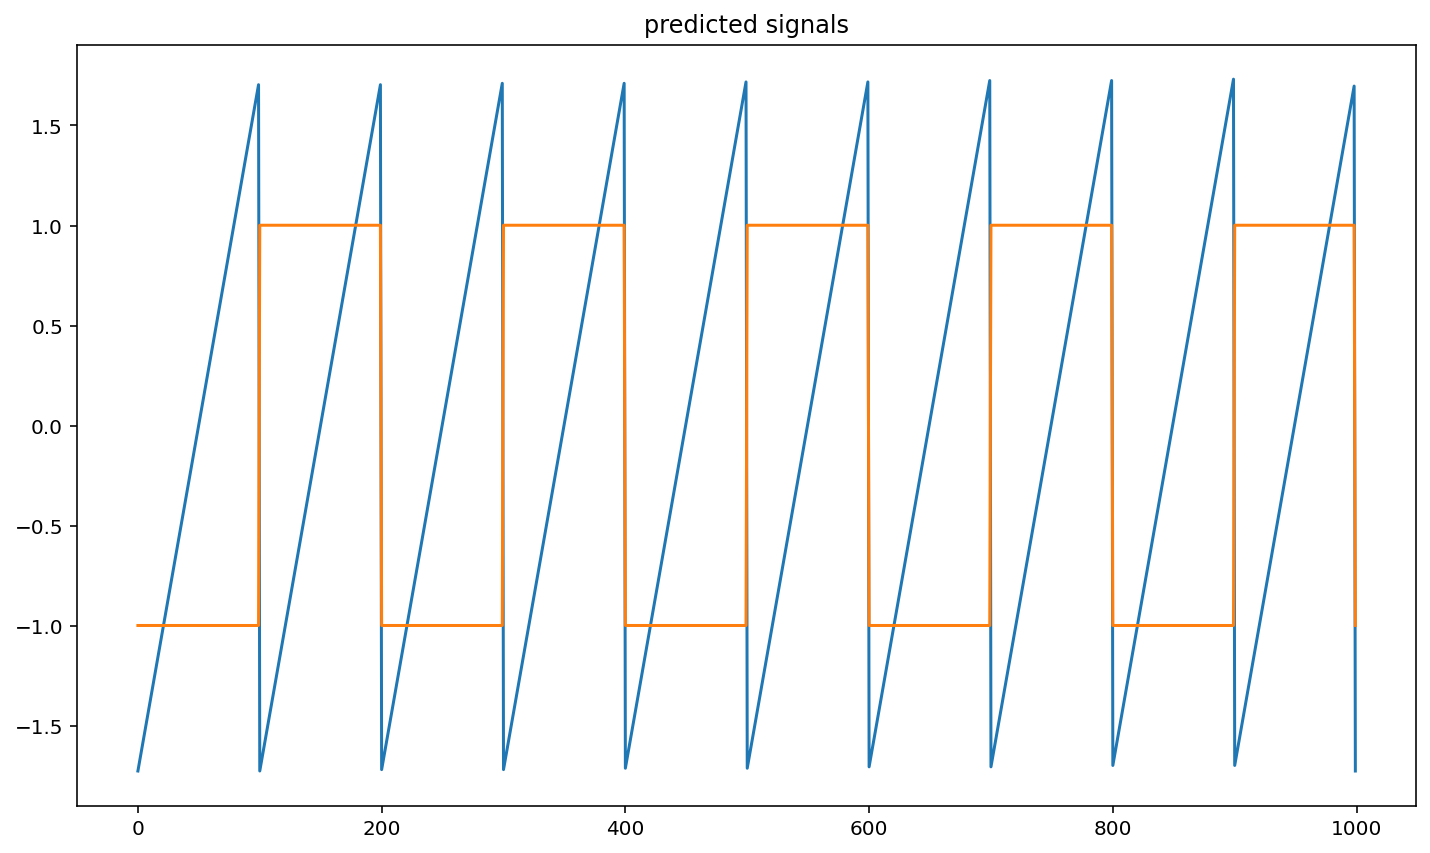

In [13]:
X_hat = OurFastICA(X, 500, len(X[0]), tolerance=1e-6)
plot_signal_matrix(X_hat, title="predicted signals")